##  Team 13: Global Terrorism
#### Team Member: Yu-Jui Chen, Darrell Shih, Gregory Murray
original data set can be found at https://www.kaggle.com/START-UMD/gtd

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [86]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

In [87]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('global_terrorism.csv')

# Q3: Hostage Survival Rates

### Data Preparation

We take the attribues that are of interest for hostage survival rates

In [122]:
dfgt_cn= df.loc[:,['region_txt',  'country_txt',
                 'weaptype1_txt', 'weapsubtype1_txt',
                 'ransom', 'ransompaid', 'ishostkid',
                 'hostkidoutcome_txt'
                
      ]]
dfgt_cn.fillna(0, inplace=True)
dfgt_cn.ishostkid.replace(to_replace=-9,value=0, inplace=True )
dfgt_nm = df.loc[:,['region_txt', 'ishostkid',
                 'weaptype1_txt', 'weapsubtype1_txt',
                 'ransom', 'ransompaid', 
                 'hostkidoutcome_txt'           
      ]]
dfgt_nm.ishostkid.fillna(0, inplace=True)

In [123]:
dfgt_tree = pd.get_dummies(dfgt_nm, dummy_na=False)

In [124]:
dfgt_tree.dropna(axis=1, how='all', inplace=True)
dfgt_tree.dropna(axis=0, how='all', inplace=True)
dfgt_tree.fillna(0, inplace=True)

In [125]:
dfgt_tree=dfgt_tree[dfgt_tree['ishostkid']==1]
dfgt_tree['ransompaid']= dfgt_tree['ransompaid'].apply(lambda d: 1 if d!=0 else 0)

remove -9 values in ransom

In [126]:
dfgt_tree.ransom.replace(-9, 0, inplace=True)
dfgt_tree[dfgt_tree['ransom']==-9]

,ishostkid,ransom,ransompaid,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe,weaptype1_txt_Biological,weaptype1_txt_Chemical,weaptype1_txt_Explosives/Bombs/Dynamite,weaptype1_txt_Fake Weapons,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Melee,weaptype1_txt_Other,weaptype1_txt_Radiological,weaptype1_txt_Sabotage Equipment,weaptype1_txt_Unknown,"weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",weapsubtype1_txt_Arson/Fire,weapsubtype1_txt_Automatic Weapon,weapsubtype1_txt_Blunt Object,weapsubtype1_txt_Dynamite/TNT,weapsubtype1_txt_Explosive,weapsubtype1_txt_Gasoline or Alcohol,weapsubtype1_txt_Grenade,weapsubtype1_txt_Handgun,"weapsubtype1_txt_Hands, Feet, Fists",weapsubtype1_txt_Knife or Other Sharp Object,weapsubtype1_txt_Land Mine,weapsubtype1_txt_Letter Bomb,weapsubtype1_txt_Molotov Cocktail/Petrol Bomb,weapsubtype1_txt_Other Explosive Type,weapsubtype1_txt_Other Gun Type,weapsubtype1_txt_Poisoning,weapsubtype1_txt_Pressure Trigger,"weapsubtype1_txt_Projectile (rockets, mortars, RPGs, etc.)",weapsubtype1_txt_Remote Trigger,weapsubtype1_txt_Rifle/Shotgun (non-automatic),weapsubtype1_txt_Rope or Other Strangling Device,weapsubtype1_txt_Sticky Bomb,weapsubtype1_txt_Suffocation,weapsubtype1_txt_Suicide (carried bodily by human being),weapsubtype1_txt_Time Fuse,weapsubtype1_txt_Unknown Explosive Type,weapsubtype1_txt_Unknown Gun Type,weapsubtype1_txt_Unknown Weapon Type,weapsubtype1_txt_Vehicle,hostkidoutcome_txt_Attempted Rescue,hostkidoutcome_txt_Combination,hostkidoutcome_txt_Hostage(s) escaped (not during rescue attempt),hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt),hostkidoutcome_txt_Hostage(s) released by perpetrators,hostkidoutcome_txt_Successful Rescue,hostkidoutcome_txt_Unknown


In [127]:
dfgt_tree.drop(['hostkidoutcome_txt_Attempted Rescue',
       u'hostkidoutcome_txt_Combination',
       u'hostkidoutcome_txt_Hostage(s) escaped (not during rescue attempt)',
       u'hostkidoutcome_txt_Hostage(s) released by perpetrators',
       u'hostkidoutcome_txt_Successful Rescue', u'hostkidoutcome_txt_Unknown'
               ], axis=1, inplace=True)

In [128]:
dfgt_tree.drop(['ishostkid'], axis=1, inplace=True)


## Machine Learning: Decision Tree

What are the predictors of hostages being killed?

In [129]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [130]:
X=dfgt_tree.drop(['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'], axis=1)

In [131]:
Y=dfgt_tree['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)']

In [132]:
dt.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

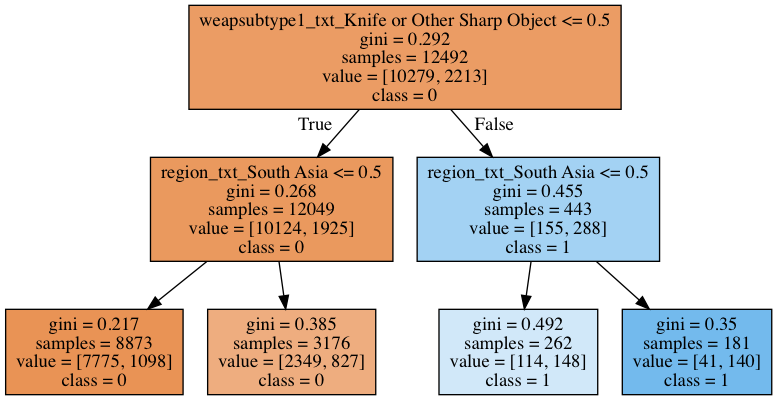

In [133]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

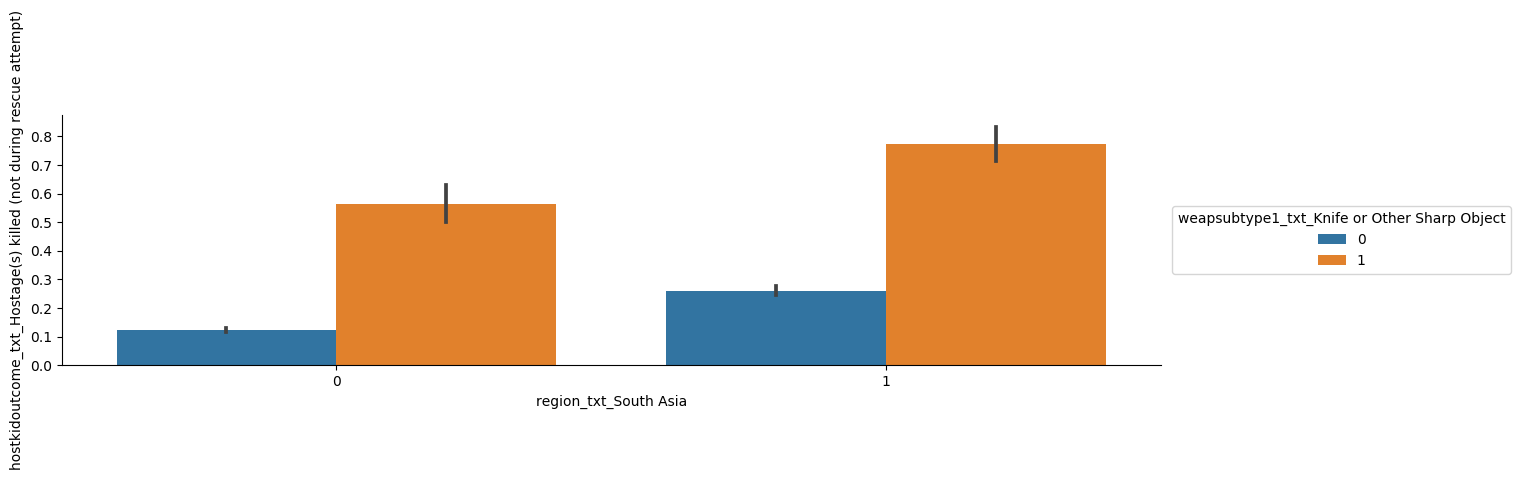

In [134]:
sns.factorplot(x='region_txt_South Asia',y='hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)',
               data=dfgt_tree,aspect=3,kind='bar',hue='weapsubtype1_txt_Knife or Other Sharp Object')

In [135]:
dfgt_cn['Host_Killed'] = dfgt_cn['hostkidoutcome_txt']=='Hostage(s) killed (not during rescue attempt)'

gpd.csv contains the country codes for geo-heatmaps

In [136]:
cc = pd.read_csv('gdp.csv')
dfgt_cn2 = dfgt_cn.copy()
dfgt_cn2 = dfgt_cn2.merge(cc, how='left', left_on='country_txt', right_on='COUNTRY')

In [137]:
dfgt_dcn2 =pd.concat([dfgt_cn2, pd.get_dummies(data=dfgt_cn, columns=['region_txt',  'country_txt',
                 'weaptype1_txt', 'weapsubtype1_txt',
                 'ransom', 'ransompaid', 'ishostkid'])], axis=1)
                

In [138]:
df_cckill = dfgt_cn2[dfgt_cn2['Host_Killed']==1].groupby('CODE').country_txt.count()
df_cckill = df_cckill.to_frame()
df_cckill.reset_index(inplace=True)

In [139]:
import plotly.plotly as py
py.sign_in('gmurray30', 'yjH0fyWN5JcLfHcXR6y6')
import pandas as pd

df = df_cckill

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['country_txt'],
        text = df['CODE'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = 'Killed',
            title = 'Hostages Killed'),
      ) ]

layout = dict(
    title = 'Hostages Killed',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gmurray30/0 or inside your plot.ly account where it is named 'd3-world-map'


create dummy cols for new data frame

In [140]:
dfgt_dcn =pd.get_dummies(dfgt_cn, dummy_na=False)

cleanup dataframe

In [141]:
dfgt_dcn=dfgt_dcn[dfgt_dcn['ishostkid']==1]
dfgt_dcn.dropna(axis=1, how='all', inplace=True)
dfgt_dcn.dropna(axis=0, how='all', inplace=True)

In [142]:
dfgt_dcn.fillna(0, inplace=True)
dfgt_dcn=dfgt_dcn[dfgt_dcn['ishostkid']==1]
dfgt_dcn.ransompaid = dfgt_dcn.ransompaid.apply(lambda d: 1 if d!=0 else 0)
dfgt_dcn.ransom.replace(-9, 1, inplace=True)

<b>Rate of hostages killed</b>: India - rate of hostages killed is double the global rate but still not the worst in the world. India's hostage-killed rate is more than that of Iraq, Afghanistan and almost double Algeria! 

Global - hostages not killed/killed totals. Ratio of ~0.2

In [143]:
dfgt_dcn.groupby('hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)')[
    'hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].count()

hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)
0    10279
1     2213
Name: hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt), dtype: int64

Global - rate hostages killed

In [144]:
dfgt_dcn['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].mean()

0.1771533781620237

#### India - rate of hostages killed is double the global rate

In [145]:
dfgt_dcn[dfgt_dcn['country_txt_India']==1]['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].mean()

0.34885620915032678

#### Hostages-killed rate for countries considered dangerous for comparison

Iraq

In [146]:
dfgt_dcn[dfgt_dcn['country_txt_Iraq']==1]['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].mean()

0.33222958057395141

Afghanistan

In [147]:
dfgt_dcn[dfgt_dcn['country_txt_Afghanistan']==1]['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].mean()

0.29799999999999999

Algeria

In [148]:
dfgt_dcn[dfgt_dcn['country_txt_Algeria']==1]['hostkidoutcome_txt_Hostage(s) killed (not during rescue attempt)'].mean()

0.20320855614973263

## Q3: Interesting Findings Summary

There are some comparisons for India's hostage-killed rate. It is more than that of Iraq, Afghanistan and almost double Algeria!

## Ransom Paid/Hostage Killed Matrix Analysis

Now let's drill down even more and see what insights we can uncover about the hostage-kill rate 
when we factor in whether the ransom was paid or not.

In [149]:
dfgt_cn.ransom.fillna(0, inplace=True)
dfgt_cn.ransompaid.fillna(0, inplace=True)
dfgt_cn['ransom'].replace(to_replace=-9, value=0, inplace=True)
dfgt_cn['ransompaid'] = dfgt_cn.ransompaid.apply(lambda d: 1 if d!=0 else 0)
def fix_ransom(df):
    if df['ransom']==0 and df['ransompaid']==1:
        return 1
    elif df['ransom']==1:
        return 1
    else:
        return 0
dfgt_cn['ransom'] = dfgt_cn.apply(fix_ransom, axis=1)

In [150]:
dfgt_cn_rp=dfgt_cn[(dfgt_dcn['ransompaid']==0) & (dfgt_cn['ransom']==1)]
dfgt_cn_rp = dfgt_cn_rp[['country_txt', 'Host_Killed']]
dfgt_dcn_rp = pd.get_dummies(dfgt_cn_rp ,columns=['country_txt'])

In [151]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)
X2=dfgt_dcn_rp.drop(['Host_Killed'], axis=1)
Y2=dfgt_dcn_rp['Host_Killed']
dt.fit(X2, Y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

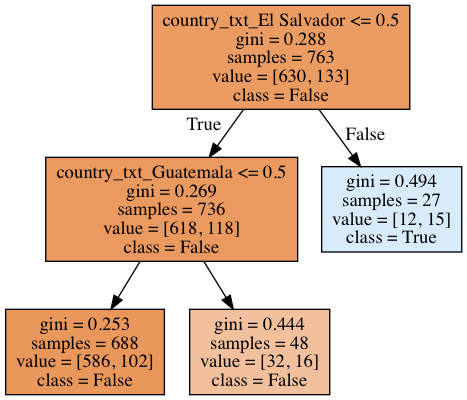

In [152]:
dt_feature_names = list(X2.columns)
dt_target_names = np.array(Y2.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Plot Guatemala vs Not Guatemala as a Hostage_Killed Predictor

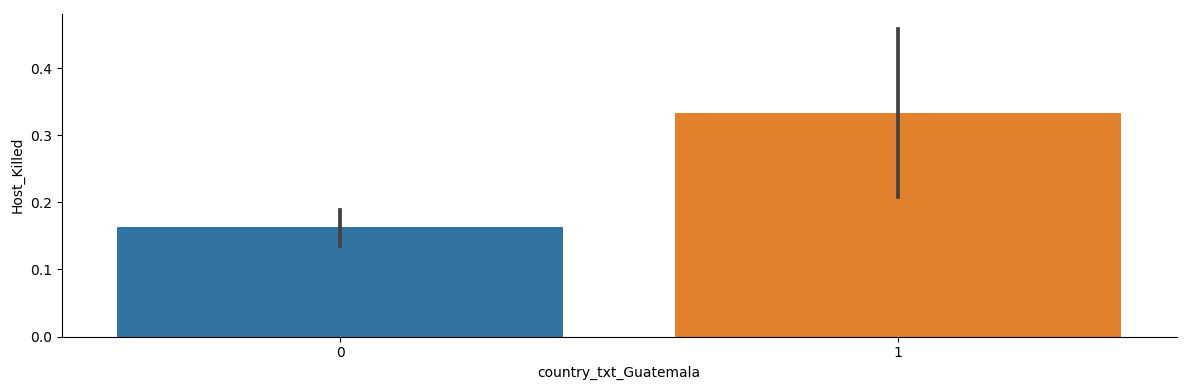

In [153]:
sns.factorplot(x='country_txt_Guatemala',y='Host_Killed',data=dfgt_dcn_rp,aspect=3,kind='bar')

Create dataframe columns for the ransom/killed matrix in dfgt_cn,
then create a matrix dataframe grouping by certain fields and the new columns
(totals and rates ie: 'killed|ransompaid')

In [154]:
dfgt_cn['RP_Host_Killed'] = (dfgt_cn['ransompaid']==1) & (
    dfgt_cn['hostkidoutcome_txt']=='Hostage(s) killed (not during rescue attempt)')
dfgt_cn['RnP_Host_Killed'] = (dfgt_cn['ransom']==1) & (dfgt_cn['ransompaid']==0) & (
    dfgt_cn['hostkidoutcome_txt']=='Hostage(s) killed (not during rescue attempt)')
dfgt_cn['RP_Host_Not_Killed'] = (dfgt_cn['ransompaid']==1) & (
    dfgt_cn['hostkidoutcome_txt']!='Hostage(s) killed (not during rescue attempt)')
dfgt_cn['RnP_Host_Not_Killed'] = (dfgt_cn['ransom']==1) & (
    dfgt_cn['ransompaid']==0) & (dfgt_cn['hostkidoutcome_txt']!='Hostage(s) killed (not during rescue attempt)')


In [155]:
kid_ransom_paid_killed = dfgt_cn[dfgt_cn['ishostkid']==1].groupby(
    'country_txt')[['ishostkid', 'ransom', 'ransompaid', 'Host_Killed', 'RP_Host_Not_Killed',
    'RP_Host_Killed','RnP_Host_Not_Killed', 'RnP_Host_Killed' ]].sum().sort_values(
    by='RnP_Host_Not_Killed', ascending=False).head(25)

In [156]:
kid_ransom_paid_killed['ransompaid_pct'] = kid_ransom_paid_killed['ransompaid']/(1+kid_ransom_paid_killed['ransom'] )
kid_ransom_paid_killed['killed|ransompaid'] = kid_ransom_paid_killed['RP_Host_Killed']/(
    1+kid_ransom_paid_killed['ransompaid']) 
kid_ransom_paid_killed['killed|ransomnotpaid'] = kid_ransom_paid_killed['RnP_Host_Killed']/(
    1+(kid_ransom_paid_killed['ransom']-kid_ransom_paid_killed['ransompaid'])) 
kid_ransom_paid_killed['notkilled|ransompaid'] = kid_ransom_paid_killed['RP_Host_Not_Killed']/(
    1+kid_ransom_paid_killed['ransompaid']) 
kid_ransom_paid_killed['notkilled|ransomnotpaid']=kid_ransom_paid_killed['RnP_Host_Not_Killed']/(
    1+(kid_ransom_paid_killed['ransom']-kid_ransom_paid_killed['ransompaid']) )

#### Ransom-Killed Matrix

In [157]:
kid_ransom_paid_killed.reset_index(inplace=True)
kid_ransom_paid_killed= kid_ransom_paid_killed.merge(
    cc, how='left', left_on='country_txt', right_on='COUNTRY')
kid_ransom_paid_killed

,country_txt,ishostkid,ransom,ransompaid,Host_Killed,RP_Host_Not_Killed,RP_Host_Killed,RnP_Host_Not_Killed,RnP_Host_Killed,ransompaid_pct,killed|ransompaid,killed|ransomnotpaid,notkilled|ransompaid,notkilled|ransomnotpaid,COUNTRY,GDP (BILLIONS),CODE
0,Colombia,1268.0,162,40,101.0,38.0,2.0,103.0,19.0,0.245399,0.048780,0.154472,0.926829,0.837398,Colombia,400.10,COL
1,Philippines,641.0,123,69,63.0,69.0,0.0,47.0,7.0,0.556452,0.000000,0.127273,0.985714,0.854545,Philippines,284.60,PHL
2,India,1224.0,100,53,427.0,50.0,3.0,44.0,3.0,0.524752,0.055556,0.062500,0.925926,0.916667,India,2048.00,IND
3,Spain,122.0,53,8,12.0,7.0,1.0,40.0,5.0,0.148148,0.111111,0.108696,0.777778,0.869565,Spain,1400.00,ESP
4,Guatemala,269.0,49,1,48.0,1.0,0.0,32.0,16.0,0.020000,0.000000,0.326531,0.500000,0.653061,Guatemala,58.30,GTM
5,Nigeria,422.0,52,29,39.0,29.0,0.0,23.0,0.0,0.547170,0.000000,0.000000,0.966667,0.958333,Nigeria,594.30,NGA
6,Pakistan,856.0,45,22,187.0,22.0,0.0,19.0,4.0,0.478261,0.000000,0.166667,0.956522,0.791667,Pakistan,237.50,PAK
7,Lebanon,190.0,21,3,13.0,3.0,0.0,16.0,2.0,0.136364,0.000000,0.105263,0.750000,0.842105,Lebanon,47.50,LBN
8,Nicaragua,136.0,24,4,6.0,4.0,0.0,16.0,4.0,0.160000,0.000000,0.190476,0.800000,0.761905,Nicaragua,11.85,NIC
9,Afghanistan,1000.0,32,12,298.0,11.0,1.0,16.0,4.0,0.363636,0.076923,0.190476,0.846154,0.761905,Afghanistan,21.71,AFG


#### Ransom-Killed Plots by Country

In [159]:
kid_ransom_not_paid=kid_ransom_paid_killed.head(11)
kid_ransom_paid = kid_ransom_paid_killed.sort_values(
    by='RP_Host_Not_Killed', inplace=True, ascending=False)
kid_ransom_paid = kid_ransom_paid_killed.head(11)
kid_ransom_paid.reset_index( inplace=True)
kid_ransom_not_paid.reset_index( inplace=True)



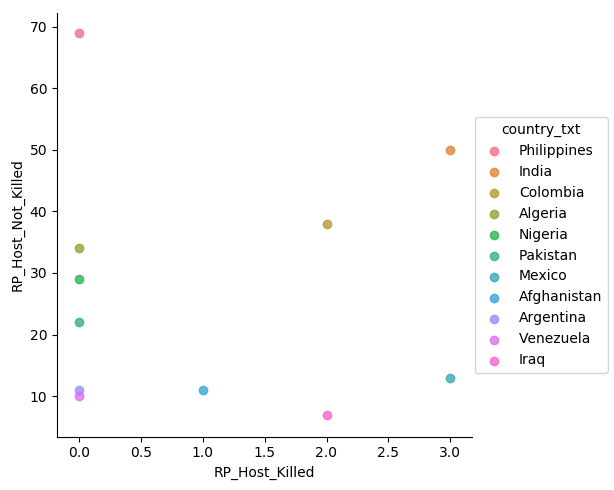

In [161]:
sns.lmplot( x='RP_Host_Killed', y= 'RP_Host_Not_Killed', data=kid_ransom_paid, fit_reg=False, hue='country_txt')

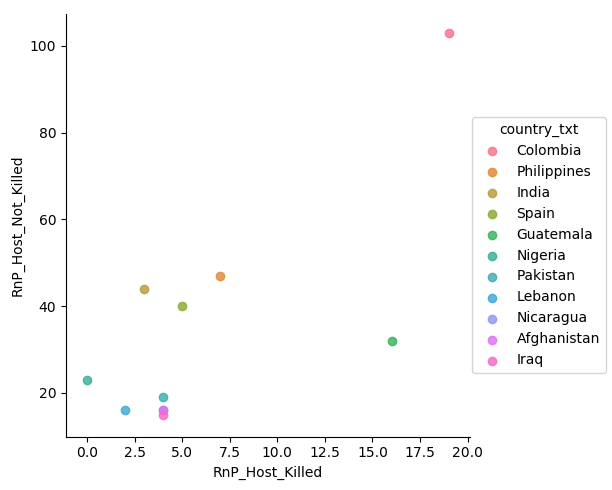

In [162]:
sns.lmplot( x='RnP_Host_Killed', y= 'RnP_Host_Not_Killed', data=kid_ransom_not_paid, fit_reg=False, hue='country_txt')

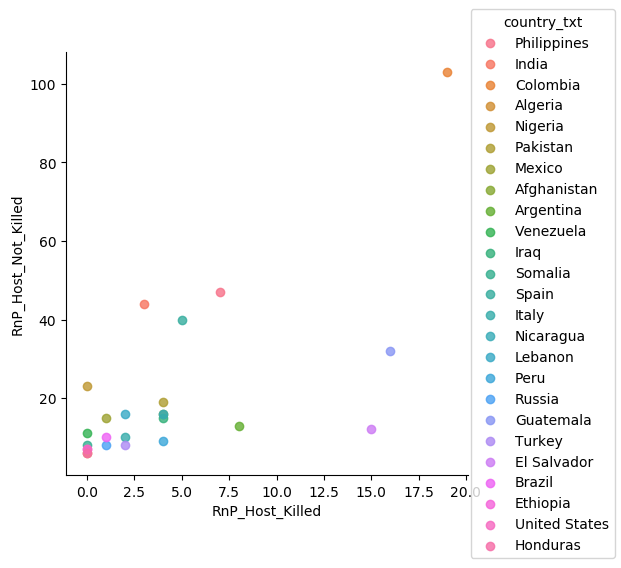

In [163]:
sns.lmplot( x='RnP_Host_Killed', y= 'RnP_Host_Not_Killed', data=kid_ransom_paid_killed, fit_reg=False, 
           hue='country_txt')

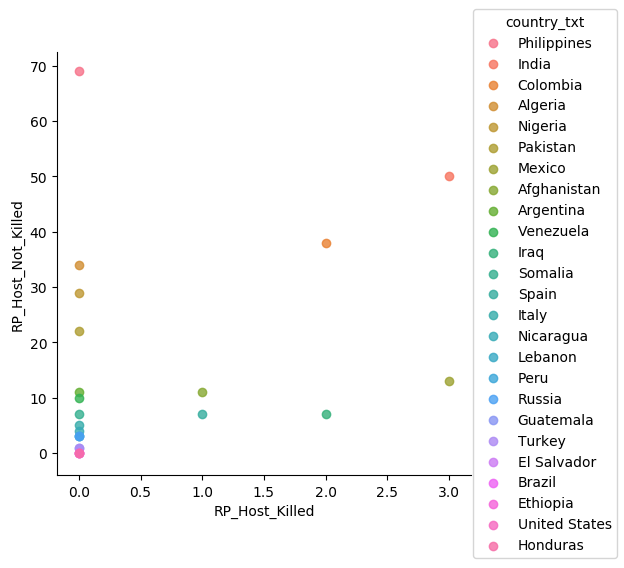

In [164]:
sns.lmplot( x='RP_Host_Killed', y= 'RP_Host_Not_Killed', data=kid_ransom_paid_killed, fit_reg=False, 
           hue='country_txt')

In [165]:
import plotly.plotly as py
py.sign_in('gmurray30', 'yjH0fyWN5JcLfHcXR6y6')
import pandas as pd

df = kid_ransom_paid_killed

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['killed|ransomnotpaid'],
        text = df['CODE'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = 'Ransom Not Paid Rate',
            title = "Don't Mess with Them"),
      ) ]

layout = dict(
    title = 'Ransom Not Paid and Hostage Killed Rate',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gmurray30/0 or inside your plot.ly account where it is named 'd3-world-map'


## MANAGERIAL INSIGHTS

What's the worst place to decide to call a kidnapper's bluff? Iraq? Sudan? Nope. Surpisingly enough, if you are 
kidnapped in Guatemala, El Salvador or skiing in Argentina this summer and get nabbed, you had better pay up! Those threee countries lead the world in 
following through on their threats with ransoms not being paid and the hostage being promptly dispatched as promised. Oddly enough, despite a kill-rate over 50%, there have been no recorded ransom payments in El Salvador and only one in Guatemala! Pick your friends wisely...

## Reference: U.S. Version

We want to compare the situation of world and the U.S started at early stage of this project, so we did it both. There is the context of U.S as reference.

### US dataset

In [166]:
terror_US = terror[terror['Country'] == 'United States']
terror_US.head()

,Year,Month,Day,Country,Region,State,city,AttackType,Killed,Wounded,Target,Target_type,Weapon_type,casualities,casualities_bin,Failed
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,0.0,0.0,Cairo Police Headquarters,Police,Firearms,0.0,False,True
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,0.0,0.0,Edes Substation,Utilities,Explosives/Bombs/Dynamite,0.0,False,True
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary,0.0,False,True
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary,0.0,False,True
10,1970,1,1,United States,North America,Wisconsin,Baraboo,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,Military,Explosives/Bombs/Dynamite,0.0,False,True


Unlike the trend of the world, the terrorists' activities decrease through years in the US

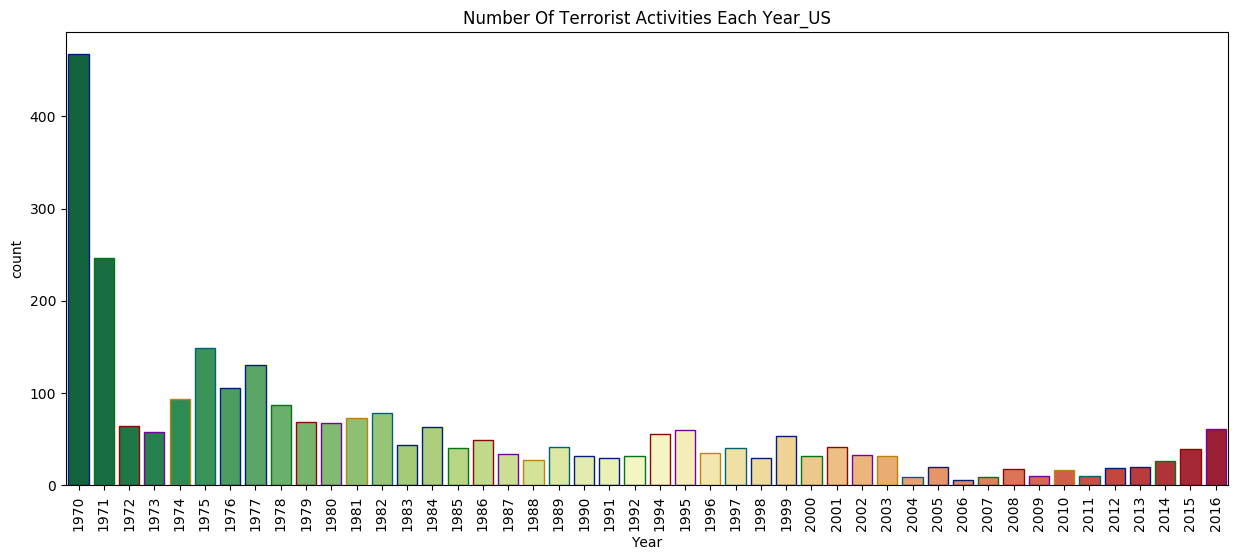

In [167]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_US,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year_US')
plt.show()

### Region

From region we can observe that even Nebraska is a small state, where are only 1.92 million people, the defense of terrorists' attack still strong.

In [168]:
h = terror_US.groupby('State').agg({'casualities':'size', 'Failed':'mean'})
h[h.casualities >= 10].sort_values(
    by = 'Failed', ascending = False).head(20).rename(columns={"casualities": 
                                                               "Num",'Failed':'Failed_Rate'}).reset_index()

,State,Failed_Rate,Num
0,New Mexico,1.000000,24
1,New Hampshire,1.000000,10
2,Idaho,1.000000,14
3,Nebraska,0.956522,23
4,Washington,0.928571,98
5,Oregon,0.892308,65
6,Wisconsin,0.891892,37
7,Arizona,0.882353,34
8,Nevada,0.875000,16
9,North Carolina,0.870968,31


Above the situation of 50 times attack, San Francisco is the city which has weakest defense in the US

In [169]:
i = terror_US.groupby('city').agg({'casualities':'size', 'Failed':'mean'}).sort_values(
    by = 'Failed', ascending = False)

i =i[i.casualities >= 50].reset_index().rename(columns={"casualities": "Num",'Failed':'Failed_Rate'})
i

,city,Failed_Rate,Num
0,Los Angeles,0.834862,109
1,Washington,0.785714,84
2,New York City,0.777283,449
3,Chicago,0.767857,56
4,San Juan,0.756522,115
5,Miami,0.682353,85
6,San Francisco,0.642857,98


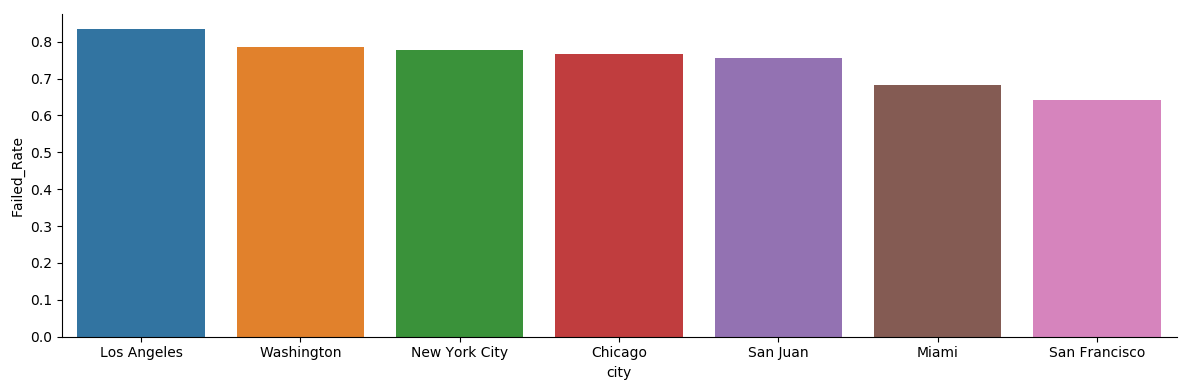

In [170]:
sns.factorplot(x='city',y='Failed_Rate',data=i,aspect =3, kind='bar')

For people who live in SFO city, be careful about the Armed Assault and Assassination.

In [171]:
terror_US[terror_US.city == 'San Francisco'].groupby('AttackType').agg({'casualities':'size', 'Failed':'mean'}
        ).sort_values(by = 'casualities', ascending = False).head(10).reset_index()

,AttackType,Failed,casualities
0,Bombing/Explosion,0.962963,54
1,Armed Assault,0.125000,24
2,Assassination,0.000000,9
3,Facility/Infrastructure Attack,1.000000,7
4,Hostage Taking (Kidnapping),0.000000,3
5,Hostage Taking (Barricade Incident),1.000000,1


### Target 

Defense of military in the US is stronger than world's status. Even in the US, police stills have lower defense compare to citizen. 

In [172]:
i =terror_US.groupby('Target_type').agg({'casualities':'size', 'Failed':'mean'}).sort_values(
    by = 'Failed', ascending = False)

i = i[i.casualities >= 30].reset_index().rename(columns={"casualities": "Num",'Failed':'Failed_Rate'})
i

,Target_type,Failed_Rate,Num
0,Utilities,0.920455,88
1,Abortion Related,0.913043,253
2,Government (Diplomatic),0.854167,144
3,Business,0.853056,769
4,Educational Institution,0.850299,167
5,Military,0.838710,186
6,Government (General),0.832817,323
7,Religious Figures/Institutions,0.810606,132
8,Airports & Aircraft,0.692308,52
9,Journalists & Media,0.586207,58


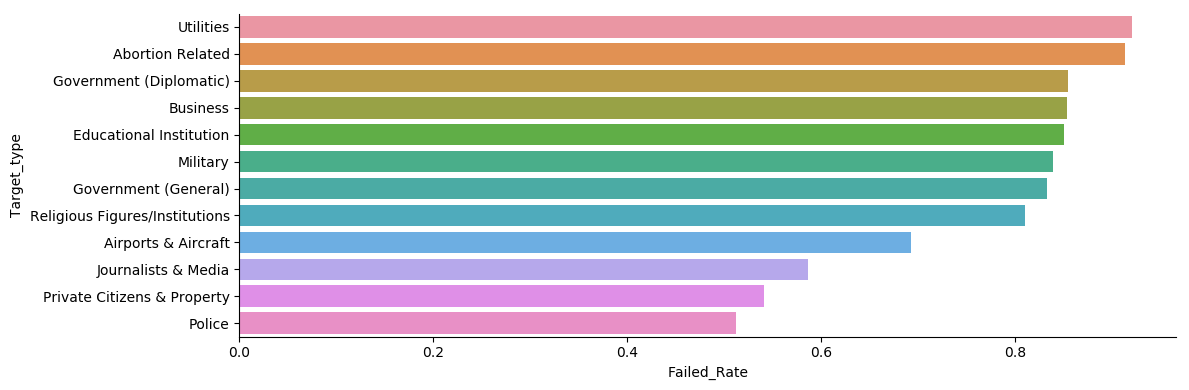

In [173]:
sns.factorplot(x='Failed_Rate',y='Target_type',data=i,aspect =3, kind='bar')

### Weapon

Terrorists more like use Explosives/Bombs or bombs as their weapon, however, the failed rate is still high. (84%)

In [174]:
j = terror_US.groupby('Weapon_type').agg({'casualities':'size', 'Failed':'mean'}).sort_values(
    by = 'casualities', ascending = False).reset_index().rename(columns={"casualities": "Num",'Failed':'Failed_Rate'})
j.head(10)

,Weapon_type,Failed_Rate,Num
0,Explosives/Bombs/Dynamite,0.843391,1392
1,Incendiary,0.935523,822
2,Firearms,0.351206,373
3,Unknown,0.461538,39
4,Melee,0.216216,37
5,Biological,0.458333,24
6,Chemical,0.761905,21
7,Sabotage Equipment,0.888889,18
8,Other,0.882353,17
9,Vehicle (not to include vehicle-borne explosiv...,0.222222,9


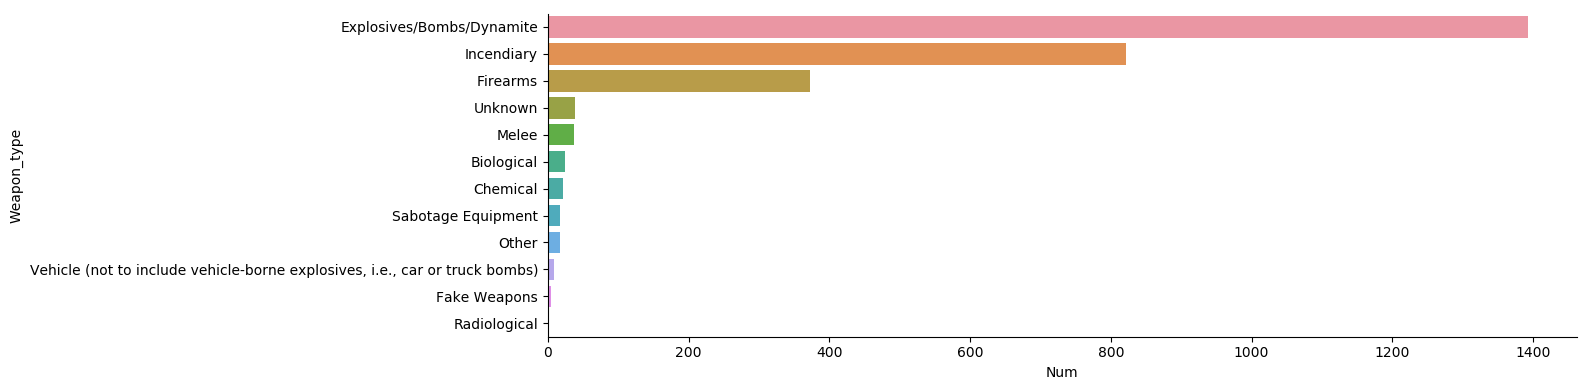

In [175]:
sns.factorplot(x='Num',y='Weapon_type',data=j,aspect =4, kind='bar')

Same as scenario of world , when terrorist used the Explosives as weapon, the failed rate is greater than using other weapons.

In [176]:
Failed_rate_US = (terror_US[terror_US['casualities'] == 0].groupby('Weapon_type').size() / len(terror_US)).sort_values(
    ascending = False)
Failed_rate_US

Weapon_type
Explosives/Bombs/Dynamite                                                      0.425671
Incendiary                                                                     0.278825
Firearms                                                                       0.047498
Unknown                                                                        0.006526
Sabotage Equipment                                                             0.005801
Chemical                                                                       0.005801
Other                                                                          0.005439
Biological                                                                     0.003988
Melee                                                                          0.002901
Fake Weapons                                                                   0.001813
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    0.000725
Radiological        

### Machine Learning: Predict Failed Factor in the US

In [177]:
US_ML = terror_US.drop(['Year','Day','city', 'Target', 'casualities', 
                        'Killed', 'Wounded', 'State', 'AttackType', 'Country', 'casualities_bin'], axis=1)

In [178]:
US_ML['Failed'] = US_ML['Failed']* 1.0

In [179]:
US_ML = pd.get_dummies(data=US_ML,columns=['Month', 'Region', 'Target_type', 'Weapon_type'])
US_ML.head()

,Failed,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Region_North America,Target_type_Abortion Related,Target_type_Airports & Aircraft,Target_type_Business,Target_type_Educational Institution,Target_type_Food or Water Supply,Target_type_Government (Diplomatic),Target_type_Government (General),Target_type_Journalists & Media,Target_type_Maritime,Target_type_Military,Target_type_NGO,Target_type_Other,Target_type_Police,Target_type_Private Citizens & Property,Target_type_Religious Figures/Institutions,Target_type_Telecommunication,Target_type_Terrorists/Non-State Militia,Target_type_Tourists,Target_type_Transportation,Target_type_Unknown,Target_type_Utilities,Target_type_Violent Political Party,Weapon_type_Biological,Weapon_type_Chemical,Weapon_type_Explosives/Bombs/Dynamite,Weapon_type_Fake Weapons,Weapon_type_Firearms,Weapon_type_Incendiary,Weapon_type_Melee,Weapon_type_Other,Weapon_type_Radiological,Weapon_type_Sabotage Equipment,Weapon_type_Unknown,"Weapon_type_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
5,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
8,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [180]:
X_1 = US_ML.drop('Failed',axis=1)
Y_1 = US_ML.Failed

In [181]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_1,Y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

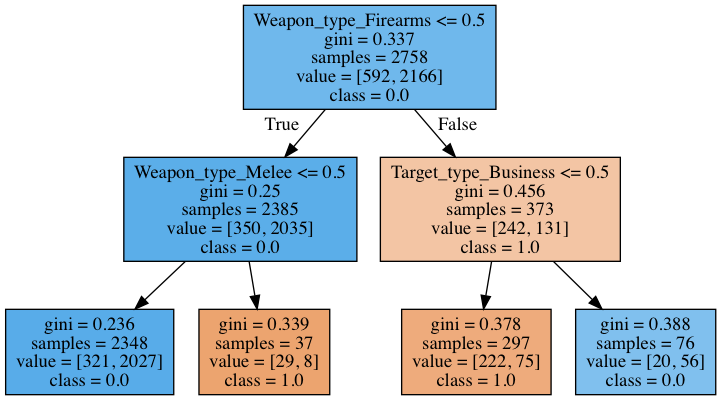

In [182]:
dt_feature_names = list(X_1.columns)
dt_target_names = np.array(Y_1.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Same as world's situation, the most important factor of no casualties is type of weapon, especially the usage of firearm. 